In [2]:
from cvxopt import matrix , solvers
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs 

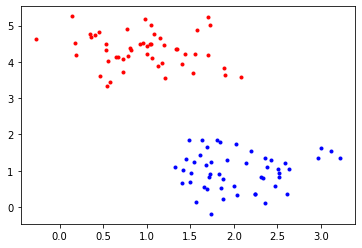

In [3]:
X, Y = make_blobs( n_samples=100, centers=2, random_state=0, cluster_std=0.49 ) 
ones = Y==1
zeros = Y==0

plt.plot(X[:,0][ones] , X[:,1][ones],'b.')
plt.plot(X[:,0][zeros] ,X[:,1][zeros],'r.')
plt.show()

In [4]:
row , col = X.shape
print(row , col)
_y = Y.reshape(-1,1) * 1.
x_dash = _y * X
H = np.dot(x_dash , x_dash.T) * 1.

p = matrix(H)
q = matrix( - np.ones((row,1)) )
G = matrix( - np.eye(row) )
H = matrix( np.zeros(row) )
A = matrix( _y.reshape(1,-1) )
B = matrix( np.zeros(1) )

#Setting solver parameters (change default to decrease tolerance) 
solvers.options['show_progress'] = False
solvers.options['abstol'] = 1e-10
solvers.options['reltol'] = 1e-10
solvers.options['feastol'] = 1e-10

sol = solvers.qp(p,q,G,H,A,B)
alphas = np.array(sol['x'])

print(alphas.shape)

w = (( alphas * _y ).T @ X).reshape(-1,1)
S = (alphas > 1e-4).flatten()
b = _y[S] - np.dot(X[S],w)

print( w,b[0])

100 2
(100, 1)
[[2.58073434e-05]
 [9.80638189e-06]] [-5.52931125e-05]


[-2.19180388  7.25966727]
[array([11.40662777]), array([-1.58979572e-05])]


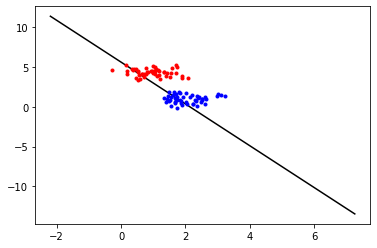

In [5]:
slope = -w[0] / w[1]
intercept = -b[0] / w[1]

x_treme = np.array([ np.min(X[:,1]) - 2 , np.max(X[:,1]) + 2 ]) 

#x_treme = np.arange(0,6)
print( x_treme )
#y_treme = - (( np.dot(x_treme,w[1]) ) + b[0] ) / w[0] 

#x_treme = np.arange(np.min(X[:,0]) , np.max(X[:,0]) )

c=0

y_treme = [(-w[0] * x_treme[0] - b[0] + c) / w[1] , (-w[1] * x_treme[1] - b[0] + c) ]

print( y_treme )

#plt.plot(x_treme ,  x_treme * slope  / intercept ,'k-' )

#plt.plot(x_treme ,  y_treme ,'k-' )

sepX1 = np.linspace(np.min(X[:,1]) - 2 , np.max(X[:,1]) + 2 , 100)
sepX2 = -b[0]/w[1] - w[0]*sepX1/w[1]

plt.plot(sepX1,sepX2,'k-')

plt.plot(X[:,0][ones] , X[:,1][ones],'b.')
plt.plot(X[:,0][zeros] ,X[:,1][zeros],'r.')

plt.show()

In [ ]:

plt.plot(X[:,0][Y==0],X[:,1][Y==0],'bs',label="Setaso")
plt.plot(X[:,0][Y==1],X[:,1][Y==1],'ys',label="Versicolor")

plt.legend()

#W = W[0]

min = np.amin(X[:,0])
max = np.amax(X[:,0])

X_0 = np.linspace(min,max,X.shape[0])
#X_1 = -W[0]/ W[1] * X_0 - b/W[1]
#X_1 = X_1[0]
# Calculating margins / Width length so that we plot the Decision Margins
#margin = 1/W[1]

# Substract the margin from the main Decision Boundry , we get Lower Bound
gutter_down = X_1 - margin

# Add the margin from the main Decision Boundry , we get Upper Bound
gutter_up = X_1 + margin

print(X_0)
print(X_1)
#plt.plot(X_0,X_1,'k-')
#plt.plot(X_0,gutter_down,'k--')
#plt.plot(X_0,gutter_up,'k--')

plot_svc_decision_boundary( svm_clf.named_steps['linear_SVC'] , 0,6)

#svs = svm_clf.support_vectors_
#plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
plt.show()